Bank_Credit_Card::categorical target dataset::
To undentify the best fitted model for identifying bank credit card holder for the default payment. 

data file reading:

In [3]:
import pandas as pd
#path=E:\Python Dataset\BankCreditCard.csv
data=pd.read_csv(r"E:\Python Dataset\BankCreditCard.csv")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
import warnings 
warnings.filterwarnings('ignore')
data.shape
#data="BankCreditCard"
data.head(10)
#data=data.drop(["Default_Payment"],axis=1)
data.shape
data.head()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#AUCROC CURVE=Area Under Curve of Receiver Operating Characteristics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
#PRC =Precision Recall Curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

In [4]:
data.head()

Customer ID  Credit_Amount  Gender  Academic_Qualification  Marital  \
0            1        20000.0       2                       2        1   
1            2       220000.0       2                       2        2   
2            3        90000.0       2                       2        2   
3            4        50000.0       2                       2        1   
4            5        50000.0       1                       2        1   

   Age_Years  Repayment_Status_Jan  Repayment_Status_Feb  \
0         24                     2                     2   
1         26                     0                     2   
2         34                     0                     0   
3         37                     0                     0   
4         57                     0                     0   

   Repayment_Status_March  Repayment_Status_April  ...  April_Bill_Amount  \
0                       0                       0  ...                0.0   
1                       0                       0  ...             3272.0   
2                       0                       0  ...            24332.0   
3                       0                       0  ...            29324.0   
4                       0                       0  ...            20940.0   

   May_Bill_Amount  June_Bill_Amount  Previous_Payment_Jan  \
0              0.0               0.0                   0.0   
1           3455.0            3261.0                   0.0   
2          14848.0           15548.0                1619.0   
3          28858.0           28547.0                3000.0   
4          18146.0           18131.0                3000.0   

   Previous_Payment_Feb  Previous_Payment_March  Previous_Payment_April  \
0                 679.0                     0.0                     0.0   
1                2000.0                  1000.0                  1000.0   
2                2500.0                  1000.0                  1000.0   
3                2029.0                  1200.0                  1100.0   
4               36672.0                 10000.0                  9000.0   

   Previous_Payment_May  Previous_Payment_June  Default_Payment  
0                   0.0                    0.0                1  
1                   0.0                 2000.0                1  
2                1000.0                 5000.0                0  
3                1069.0                 1000.0                0  
4                 689.0                  679.0                0  

[5 rows x 25 columns]

In [5]:
data.shape

(30000, 25)

data cleaning /preprocessing:

In [7]:
data.isnull().sum()

Customer ID               0
Credit_Amount             0
Gender                    0
Academic_Qualification    0
Marital                   0
Age_Years                 0
Repayment_Status_Jan      0
Repayment_Status_Feb      0
Repayment_Status_March    0
Repayment_Status_April    0
Repayment_Status_May      0
Repayment_Status_June     0
Jan_Bill_Amount           0
Feb_Bill_Amount           0
March_Bill_Amount         0
April_Bill_Amount         0
May_Bill_Amount           0
June_Bill_Amount          0
Previous_Payment_Jan      0
Previous_Payment_Feb      0
Previous_Payment_March    0
Previous_Payment_April    0
Previous_Payment_May      0
Previous_Payment_June     0
Default_Payment           0
dtype: int64

In [8]:
data.dtypes

Customer ID                 int64
Credit_Amount             float64
Gender                      int64
Academic_Qualification      int64
Marital                     int64
Age_Years                   int64
Repayment_Status_Jan        int64
Repayment_Status_Feb        int64
Repayment_Status_March      int64
Repayment_Status_April      int64
Repayment_Status_May        int64
Repayment_Status_June       int64
Jan_Bill_Amount           float64
Feb_Bill_Amount           float64
March_Bill_Amount         float64
April_Bill_Amount         float64
May_Bill_Amount           float64
June_Bill_Amount          float64
Previous_Payment_Jan      float64
Previous_Payment_Feb      float64
Previous_Payment_March    float64
Previous_Payment_April    float64
Previous_Payment_May      float64
Previous_Payment_June     float64
Default_Payment             int64
dtype: object

In [9]:
data.info()# hence no need to do missing value treatment or imputing method.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             30000 non-null  int64  
 1   Credit_Amount           30000 non-null  float64
 2   Gender                  30000 non-null  int64  
 3   Academic_Qualification  30000 non-null  int64  
 4   Marital                 30000 non-null  int64  
 5   Age_Years               30000 non-null  int64  
 6   Repayment_Status_Jan    30000 non-null  int64  
 7   Repayment_Status_Feb    30000 non-null  int64  
 8   Repayment_Status_March  30000 non-null  int64  
 9   Repayment_Status_April  30000 non-null  int64  
 10  Repayment_Status_May    30000 non-null  int64  
 11  Repayment_Status_June   30000 non-null  int64  
 12  Jan_Bill_Amount         30000 non-null  float64
 13  Feb_Bill_Amount         30000 non-null  float64
 14  March_Bill_Amount       30000 non-null

data type casting :

In [11]:
#!pip install scikit-learn

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

As all columns are already has int and float values , hence no need to do Type casting from categorical to numerical conversion.

Duplicate checking.

In [15]:
data.shape

(30000, 25)

In [16]:
data.drop_duplicates(inplace=True)

In [17]:
data.shape

(30000, 25)

In [18]:
data.Credit_Amount.value_counts()

Credit_Amount
50000.0      3365
200000.0     2576
220000.0     2513
20000.0      2469
30000.0      1610
             ... 
730000.0        2
2000000.0       1
327680.0        1
760000.0        1
690000.0        1
Name: count, Length: 64, dtype: int64

EDA::

class imbalance::

By nearmiss undersampling method:

In [22]:
data.Default_Payment.value_counts

<bound method IndexOpsMixin.value_counts of 0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: Default_Payment, Length: 30000, dtype: int64>

In [23]:
from imblearn.under_sampling import NearMiss
nm=NearMiss()

In [24]:
data.shape

(30000, 25)

In [25]:
data_x=data.iloc[:,0:-1]# independent col

In [26]:
data.head()

Customer ID  Credit_Amount  Gender  Academic_Qualification  Marital  \
0            1        20000.0       2                       2        1   
1            2       220000.0       2                       2        2   
2            3        90000.0       2                       2        2   
3            4        50000.0       2                       2        1   
4            5        50000.0       1                       2        1   

   Age_Years  Repayment_Status_Jan  Repayment_Status_Feb  \
0         24                     2                     2   
1         26                     0                     2   
2         34                     0                     0   
3         37                     0                     0   
4         57                     0                     0   

   Repayment_Status_March  Repayment_Status_April  ...  April_Bill_Amount  \
0                       0                       0  ...                0.0   
1                       0                       0  ...             3272.0   
2                       0                       0  ...            24332.0   
3                       0                       0  ...            29324.0   
4                       0                       0  ...            20940.0   

   May_Bill_Amount  June_Bill_Amount  Previous_Payment_Jan  \
0              0.0               0.0                   0.0   
1           3455.0            3261.0                   0.0   
2          14848.0           15548.0                1619.0   
3          28858.0           28547.0                3000.0   
4          18146.0           18131.0                3000.0   

   Previous_Payment_Feb  Previous_Payment_March  Previous_Payment_April  \
0                 679.0                     0.0                     0.0   
1                2000.0                  1000.0                  1000.0   
2                2500.0                  1000.0                  1000.0   
3                2029.0                  1200.0                  1100.0   
4               36672.0                 10000.0                  9000.0   

   Previous_Payment_May  Previous_Payment_June  Default_Payment  
0                   0.0                    0.0                1  
1                   0.0                 2000.0                1  
2                1000.0                 5000.0                0  
3                1069.0                 1000.0                0  
4                 689.0                  679.0                0  

[5 rows x 25 columns]

In [27]:
data_y=data.iloc[:,-1]# dependent col/target col
data.head()

Customer ID  Credit_Amount  Gender  Academic_Qualification  Marital  \
0            1        20000.0       2                       2        1   
1            2       220000.0       2                       2        2   
2            3        90000.0       2                       2        2   
3            4        50000.0       2                       2        1   
4            5        50000.0       1                       2        1   

   Age_Years  Repayment_Status_Jan  Repayment_Status_Feb  \
0         24                     2                     2   
1         26                     0                     2   
2         34                     0                     0   
3         37                     0                     0   
4         57                     0                     0   

   Repayment_Status_March  Repayment_Status_April  ...  April_Bill_Amount  \
0                       0                       0  ...                0.0   
1                       0                       0  ...             3272.0   
2                       0                       0  ...            24332.0   
3                       0                       0  ...            29324.0   
4                       0                       0  ...            20940.0   

   May_Bill_Amount  June_Bill_Amount  Previous_Payment_Jan  \
0              0.0               0.0                   0.0   
1           3455.0            3261.0                   0.0   
2          14848.0           15548.0                1619.0   
3          28858.0           28547.0                3000.0   
4          18146.0           18131.0                3000.0   

   Previous_Payment_Feb  Previous_Payment_March  Previous_Payment_April  \
0                 679.0                     0.0                     0.0   
1                2000.0                  1000.0                  1000.0   
2                2500.0                  1000.0                  1000.0   
3                2029.0                  1200.0                  1100.0   
4               36672.0                 10000.0                  9000.0   

   Previous_Payment_May  Previous_Payment_June  Default_Payment  
0                   0.0                    0.0                1  
1                   0.0                 2000.0                1  
2                1000.0                 5000.0                0  
3                1069.0                 1000.0                0  
4                 689.0                  679.0                0  

[5 rows x 25 columns]

In [28]:
x_nm,y_nm=nm.fit_resample(data_x,data_y)
x_nm.shape,y_nm.shape

((13272, 24), (13272,))

In [29]:
y_nm.value_counts()

Default_Payment
0    6636
1    6636
Name: count, dtype: int64

outlier treatment::Detect & impute the outliers::

In [31]:
outliers=[]
l1=data["Credit_Amount"]
def detect_outlier(l1):
 threshold=3
 mean=np.mean(l1)
 std=np.std(l1)

 for i in l1:
     z_score=(i-mean)/std
 if np.abs(z_score)>threshold:
    outlier.append(i)
 return outliers
detect_outlier(l1)

[]

In [32]:
outliers=[]
l2=data["Age_Years"]
def detect_outlier(l2):
 threshold=3
 mean=np.mean(l2)
 std=np.std(l2)

 for i in l2:
     z_score=(i-mean)/std
 if np.abs(z_score)>threshold:
    outlier.append(i)
 return outliers
detect_outlier(l2)

[]

In [33]:
outliers=[]
l3=data["Jan_Bill_Amount"]
def detect_outlier(l3):
 threshold=3
 mean=np.mean(l3)
 std=np.std(l3)

 for i in l2:
     z_score=(i-mean)/std
 if np.abs(z_score)>threshold:
    outlier.append(i)
 return outliers
detect_outlier(l3)

[]

In [34]:
outliers=[]
l4=data["Feb_Bill_Amount"]
def detect_outlier(l4):
 threshold=3
 mean=np.mean(l4)
 std=np.std(l4)

 for i in l2:
     z_score=(i-mean)/std
 if np.abs(z_score)>threshold:
    outlier.append(i)
 return outliers
detect_outlier(l4)

[]

In [35]:
outliers=[]
l5=data["March_Bill_Amount"]
def detect_outlier(l5):
 threshold=3
 mean=np.mean(l5)
 std=np.std(l5)

 for i in l2:
     z_score=(i-mean)/std
 if np.abs(z_score)>threshold:
    outlier.append(i)
 return outliers
detect_outlier(l5)

[]

In [36]:
outliers=[]
l6=data["April_Bill_Amount"]
def detect_outlier(l6):
 threshold=3
 mean=np.mean(l6)
 std=np.std(l6)

 for i in l2:
     z_score=(i-mean)/std
 if np.abs(z_score)>threshold:
    outlier.append(i)
 return outliers
detect_outlier(l6)

[]

In [37]:
outliers=[]
l7=data["May_Bill_Amount"]
def detect_outlier(l7):
 threshold=3
 mean=np.mean(l7)
 std=np.std(l7)

 for i in l2:
     z_score=(i-mean)/std
 if np.abs(z_score)>threshold:
    outlier.append(i)
 return outliers
detect_outlier(l7)

[]

In [38]:
outliers=[]
l8=data["June_Bill_Amount"]
def detect_outlier(l8):
 threshold=3
 mean=np.mean(l8)
 std=np.std(l8)

 for i in l2:
     z_score=(i-mean)/std
 if np.abs(z_score)>threshold:
    outlier.append(i)
 return outliers
detect_outlier(l8)

[]

In [39]:
outliers=[]
l9=data["Previous_Payment_Jan"]
def detect_outlier(l9):
 threshold=3
 mean=np.mean(l9)
 std=np.std(l9)

 for i in l2:
     z_score=(i-mean)/std
 if np.abs(z_score)>threshold:
    outlier.append(i)
 return outliers
detect_outlier(l9)

[]

In [40]:
outliers=[]
l10=data["Previous_Payment_Feb"]
def detect_outlier(l10):
 threshold=3
 mean=np.mean(l10)
 std=np.std(l10)

 for i in l2:
     z_score=(i-mean)/std
 if np.abs(z_score)>threshold:
    outlier.append(i)
 return outliers
detect_outlier(l10)

[]

In [41]:
outliers=[]
l11=data["Previous_Payment_March"]
def detect_outlier(l11):
 threshold=3
 mean=np.mean(l11)
 std=np.std(l11)

 for i in l2:
     z_score=(i-mean)/std
 if np.abs(z_score)>threshold:
    outlier.append(i)
 return outliers
detect_outlier(l11)

[]

In [42]:
outliers=[]
l12=data["Previous_Payment_April"]
def detect_outlier(l12):
 threshold=3
 mean=np.mean(l12)
 std=np.std(l12)

 for i in l2:
     z_score=(i-mean)/std
 if np.abs(z_score)>threshold:
    outlier.append(i)
 return outliers
detect_outlier(l12)

[]

In [43]:
outliers=[]
l13=data["Previous_Payment_May"]
def detect_outlier(l13):
 threshold=3
 mean=np.mean(l13)
 std=np.std(l13)

 for i in l2:
     z_score=(i-mean)/std
 if np.abs(z_score)>threshold:
    outlier.append(i)
 return outliers
detect_outlier(l13)

[]

In [44]:
outliers=[]
l14=data["Previous_Payment_June"]
def detect_outlier(l14):
 threshold=3
 mean=np.mean(l14)
 std=np.std(l14)

 for i in l2:
     z_score=(i-mean)/std
 if np.abs(z_score)>threshold:
    outlier.append(i)
 return outliers
detect_outlier(l14)

[]

<Axes: ylabel='Credit_Amount'>

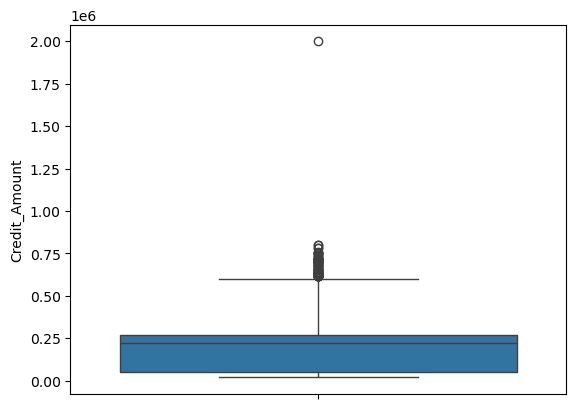

In [45]:
import seaborn as sns
sns.boxplot(data=data,y="Credit_Amount")

<Axes: >

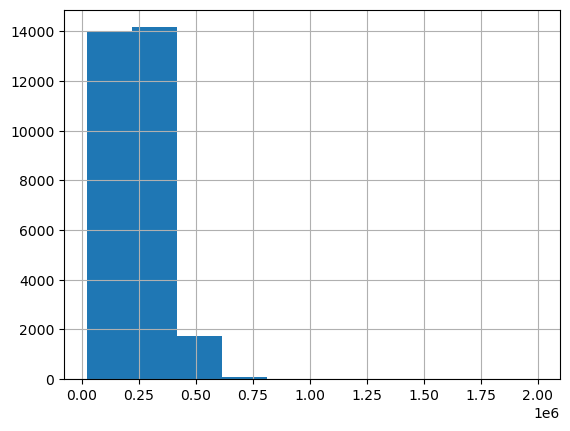

In [46]:
data.Credit_Amount.hist()

<Axes: xlabel='Credit_Amount', ylabel='Density'>

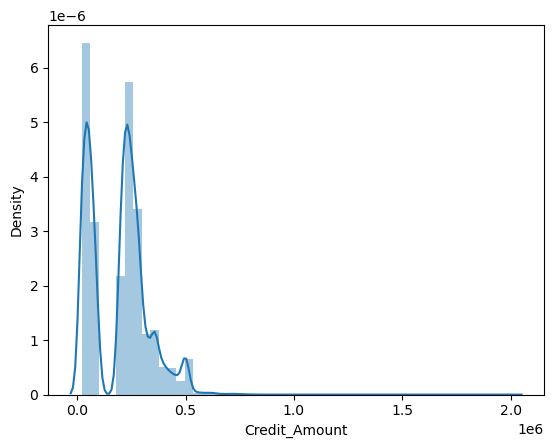

In [47]:
sns.distplot(data.Credit_Amount)

In [48]:
ub=data["Credit_Amount"].mean()+3*data["Credit_Amount"].std()
lb=data["Credit_Amount"].mean()-3*data["Credit_Amount"].std()
print(ub,lb)

589783.5816067288 -203948.93627339546


In [49]:
data["Credit_Amount"].describe()

count    3.000000e+04
mean     1.929173e+05
std      1.322888e+05
min      2.000000e+04
25%      5.000000e+04
50%      2.200000e+05
75%      2.700000e+05
max      2.000000e+06
Name: Credit_Amount, dtype: float64

<Axes: xlabel='Credit_Amount', ylabel='Density'>

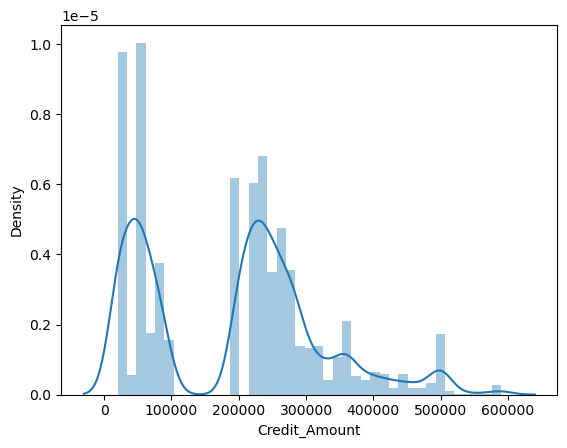

In [50]:
data.loc[data["Credit_Amount"]>ub,"Credit_Amount"]=ub
sns.distplot(data.Credit_Amount)

<Axes: ylabel='Credit_Amount'>

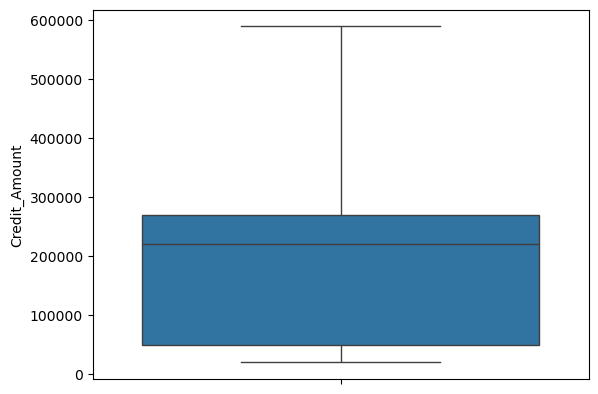

In [51]:
sns.boxplot(data=data,y="Credit_Amount")

#IQR::

In [53]:
IQR=data.Credit_Amount.quantile(0.75)-data.Credit_Amount.quantile(0.25)
L1=data["Credit_Amount"].quantile(0.25)-(IQR*3)
U1=data["Credit_Amount"].quantile(0.75)+(IQR*3)
print(L1,U1)

-610000.0 930000.0


<Axes: xlabel='Credit_Amount', ylabel='Density'>

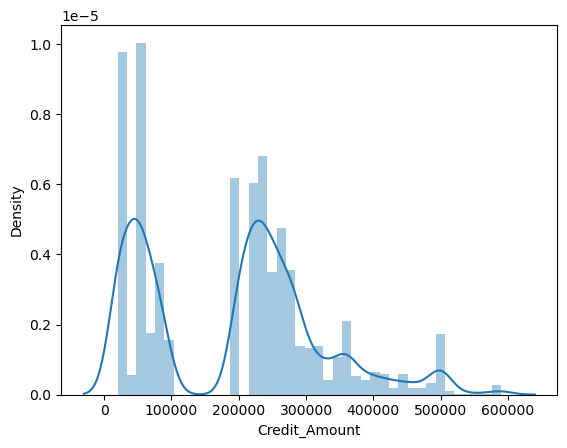

In [54]:
data.loc[data["Credit_Amount"]>U1,"Credit_Amount"]=U1
sns.distplot(data.Credit_Amount)

<Axes: ylabel='Age_Years'>

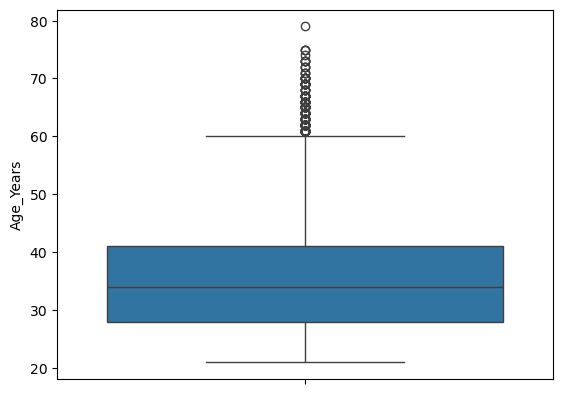

In [55]:
import seaborn as sns
sns.boxplot(data=data,y="Age_Years")

<Axes: >

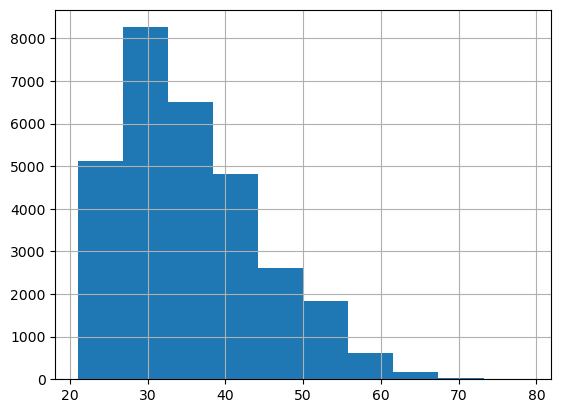

In [56]:
data.Age_Years.hist()

<Axes: xlabel='Age_Years', ylabel='Density'>

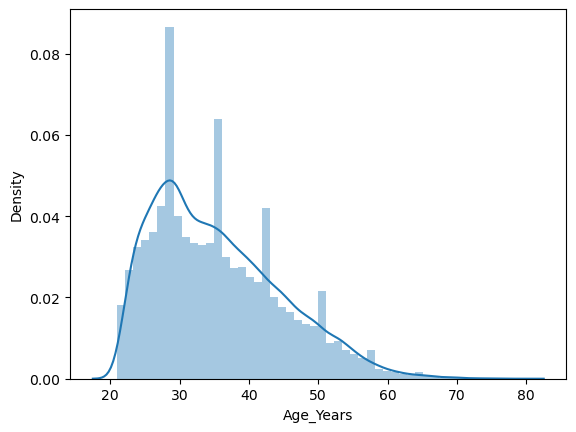

In [57]:
sns.distplot(data.Age_Years)

In [58]:
ub=data["Age_Years"].mean()+3*data["Age_Years"].std()
lb=data["Age_Years"].mean()-3*data["Age_Years"].std()
print(ub,lb)

63.13921220427055 7.831787795729454


In [59]:
data["Age_Years"].describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: Age_Years, dtype: float64

In [60]:
data.loc[data["Age_Years"]>ub,"Age_Years"]=ub
sns.boxplot(data=data,y="Age_Years")

<Axes: ylabel='Age_Years'>

skewness treatment::

In [62]:
data.Age_Years.skew()

0.6861989739472008

In [63]:
import numpy as np
np.log(0)

-inf

In [64]:
data.shape

(30000, 25)

In [65]:
data_new=data[data.Age_Years<0]

In [66]:
data_new.shape

(0, 25)

In [67]:
IQR=data.Age_Years.quantile(0.75)-data.Age_Years.quantile(0.25)
L1=data["Age_Years"].quantile(0.25)-(IQR*3)
U1=data["Age_Years"].quantile(0.75)+(IQR*3)
print(L1,U1)

-11.0 80.0


In [68]:
data.loc[data["Age_Years"]>U1,"Age_Years"]=U1
sns.distplot(data.Age_Years)

<Axes: xlabel='Age_Years', ylabel='Density'>

In [69]:
data["Age_Years"]=np.log(data["Age_Years"])
data.Age_Years.skew()

0.22648272730283384

In [70]:
import seaborn as sns
sns.boxplot(data=data,y="Jan_Bill_Amount")

<Axes: ylabel='Jan_Bill_Amount'>

In [71]:
data.Jan_Bill_Amount.hist()#As this is a categorical column no need to do outliers and skewness treatment .

<Axes: >

In [72]:
#upto data.June_Bill_Amount.hist()#As this is a categorical column no need to do outliers and skewness treatment .

<Axes: ylabel='Previous_Payment_Jan'>

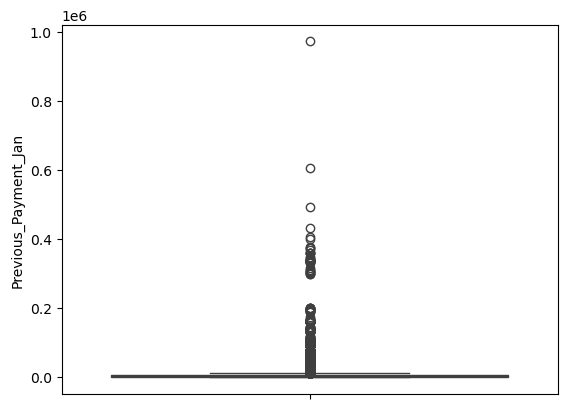

In [73]:
import seaborn as sns
sns.boxplot(data=data,y="Previous_Payment_Jan")

In [74]:
data.Previous_Payment_Jan.hist()# As data is not skewed hence no need to do skewness treatment.

<Axes: >

In [75]:
# same like upto data.Previous_Payment_June columns are  non skewd no need to do skewness and outlier treatment.

In [76]:
sns.distplot(data.Previous_Payment_Jan)

<Axes: xlabel='Previous_Payment_Jan', ylabel='Density'>

# same like upto data.Previous_Payment_June columns are  non skewd no need to do skewness and outlier treatment.

In [78]:
data1=data.corr()
data1

Customer ID  Credit_Amount    Gender  \
Customer ID                1.000000       0.027513  0.018497   
Credit_Amount              0.027513       1.000000  0.040159   
Gender                     0.018497       0.040159  1.000000   
Academic_Qualification     0.039828      -0.214602  0.012897   
Marital                   -0.029079      -0.105108 -0.031389   
Age_Years                  0.022954       0.169584 -0.093481   
Repayment_Status_Jan      -0.020016      -0.175199 -0.034521   
Repayment_Status_Feb      -0.009494      -0.201721 -0.044876   
Repayment_Status_March    -0.018233      -0.197125 -0.041174   
Repayment_Status_April     0.013914      -0.186590 -0.039701   
Repayment_Status_May      -0.020911      -0.174821 -0.038613   
Repayment_Status_June     -0.033201      -0.169280 -0.032042   
Jan_Bill_Amount            0.014824       0.285670 -0.028792   
Feb_Bill_Amount            0.020680       0.277321 -0.030322   
March_Bill_Amount          0.019882       0.286976 -0.022342   
April_Bill_Amount          0.035671       0.295306 -0.020222   
May_Bill_Amount            0.016959       0.299838 -0.016988   
June_Bill_Amount           0.016620       0.295610 -0.016661   
Previous_Payment_Jan       0.009667       0.178156 -0.000450   
Previous_Payment_Feb       0.008546       0.141380 -0.000724   
Previous_Payment_March     0.037526       0.186508 -0.007833   
Previous_Payment_April     0.008646       0.185707 -0.002471   
Previous_Payment_May       0.003044       0.199021 -0.001337   
Previous_Payment_June      0.003000       0.205864 -0.002766   
Default_Payment           -0.013952      -0.157419 -0.039961   

                        Academic_Qualification   Marital  Age_Years  \
Customer ID                           0.039828 -0.029079   0.022954   
Credit_Amount                        -0.214602 -0.105108   0.169584   
Gender                                0.012897 -0.031389  -0.093481   
Academic_Qualification                1.000000 -0.141637   0.162862   
Marital                              -0.141637  1.000000  -0.432287   
Age_Years                             0.162862 -0.432287   1.000000   
Repayment_Status_Jan                  0.049837 -0.011686  -0.009065   
Repayment_Status_Feb                  0.054034 -0.009814  -0.016097   
Repayment_Status_March                0.044626  0.000334  -0.021334   
Repayment_Status_April                0.043856 -0.004372  -0.013332   
Repayment_Status_May                  0.032593 -0.003106  -0.020051   
Repayment_Status_June                 0.021863  0.002056  -0.024352   
Jan_Bill_Amount                       0.022945 -0.025129   0.058092   
Feb_Bill_Amount                       0.014368 -0.022228   0.062778   
March_Bill_Amount                     0.012281 -0.024802   0.055935   
April_Bill_Amount                     0.000233 -0.022968   0.055075   
May_Bill_Amount                      -0.009492 -0.025466   0.057480   
June_Bill_Amount                     -0.011344 -0.021300   0.055354   
Previous_Payment_Jan                 -0.036724 -0.006659   0.031362   
Previous_Payment_Feb                 -0.024299 -0.005525   0.022401   
Previous_Payment_March               -0.037803 -0.003442   0.035053   
Previous_Payment_April               -0.037529 -0.013082   0.025929   
Previous_Payment_May                 -0.039920 -0.000316   0.027162   
Previous_Payment_June                -0.037448 -0.006641   0.026169   
Default_Payment                       0.025985 -0.024339   0.007298   

                        Repayment_Status_Jan  Repayment_Status_Feb  \
Customer ID                        -0.020016             -0.009494   
Credit_Amount                      -0.175199             -0.201721   
Gender                             -0.034521             -0.044876   
Academic_Qualification              0.049837              0.054034   
Marital                            -0.011686             -0.009814   
Age_Years                          -0.009065             -0.016097   
Repayment_Status_Jan  

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(data1)
plt.show()

model_selection process::

In [81]:
x=data.iloc[:,:-1]

In [82]:
x.head()
x.shape

(30000, 24)

In [83]:
y=data.iloc[:,-1]

In [84]:
y.head()
y.shape

(30000,)

In [85]:
import sklearn
from sklearn.model_selection import train_test_split

In [86]:
dx_train,dx_test,dy_train,dy_test=train_test_split(data_x,data_y,test_size=0.2,random_state=101)

In [87]:
dx_train.shape,dx_test.shape,dy_train.shape,dy_test.shape

((24000, 24), (6000, 24), (24000,), (6000,))

1.Logistic Regression

In [89]:
log.fit(dx_train,dy_train)

LogisticRegression()

In [90]:
LogisticRegression()
p1=log.predict(dx_test)
p1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [91]:
pred_prob=log.predict_proba(dx_test)
pred_prob

array([[0.59184371, 0.40815629],
       [0.71363487, 0.28636513],
       [0.66501578, 0.33498422],
       ...,
       [0.99761881, 0.00238119],
       [0.64352295, 0.35647705],
       [0.85711284, 0.14288716]])

In [92]:
M1=confusion_matrix(p1,dy_test)
M1

array([[4689, 1309],
       [   1,    1]], dtype=int64)

In [93]:
ac1=M1.diagonal().sum()/M1.sum()*100
ac1

78.16666666666666

In [94]:
print(classification_report(p1,dy_test))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88      5998
           1       0.00      0.50      0.00         2

    accuracy                           0.78      6000
   macro avg       0.50      0.64      0.44      6000
weighted avg       1.00      0.78      0.88      6000



In [95]:
df=pd.DataFrame(pred_prob)
df

0         1
0     0.591844  0.408156
1     0.713635  0.286365
2     0.665016  0.334984
3     0.702769  0.297231
4     0.785533  0.214467
...        ...       ...
5995  0.819680  0.180320
5996  0.828791  0.171209
5997  0.997619  0.002381
5998  0.643523  0.356477
5999  0.857113  0.142887

[6000 rows x 2 columns]

In [96]:
roc=roc_auc_score(p1,dy_test)
roc

0.6408802934311437

In [145]:
fpr,tpr,threshold=roc_curve(dy_test,df.iloc[:,1])

In [98]:
fpr

array([0.00000000e+00, 0.00000000e+00, 2.13219616e-04, ...,
       9.96588486e-01, 9.96588486e-01, 1.00000000e+00])

In [99]:
tpr

array([0.00000000e+00, 7.63358779e-04, 7.63358779e-04, ...,
       9.99236641e-01, 1.00000000e+00, 1.00000000e+00])

Text(0.5, 1.0, 'fpr_tpr')

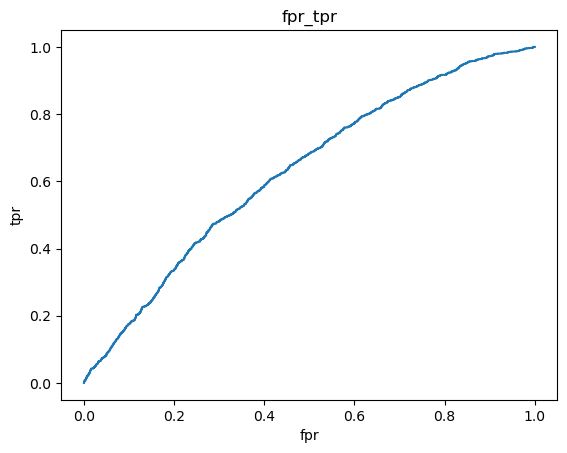

In [147]:
plt.plot(fpr,tpr)
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("fpr_tpr")

In [101]:
#tpr=Tp/(Tp+Fn)
#fpr=Fp/(Fp+Tn)
#PRC =Precision Recall Curve
#precision=Tp/(Tp+Fp)
#Recall=Tp/(Tp+Fn)

In [102]:
precision,recall,threshold=precision_recall_curve(dy_test,df.iloc[:,1])

In [103]:
precision

array([0.21833333, 0.21836973, 0.21840614, ..., 0.5       , 1.        ,
       1.        ])

In [104]:
recall

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
       7.63358779e-04, 7.63358779e-04, 0.00000000e+00])

In [105]:
plt.plot(recall,precision,label="PRC_Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Pre_Recall ")

Text(0.5, 1.0, 'Pre_Recall ')

2.Decision Tree(DT)::

In [107]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [108]:
dt.fit(dx_train,dy_train)

DecisionTreeClassifier()

In [109]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [110]:
p2=dt.predict(dx_test)
p2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [111]:
M2=confusion_matrix(p2,dy_test)
M2

array([[3843,  822],
       [ 847,  488]], dtype=int64)

In [112]:
ac2=M2.diagonal().sum()/M2.sum()*100
ac2

72.18333333333334

In [113]:
print(classification_report(p2,dy_test))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      4665
           1       0.37      0.37      0.37      1335

    accuracy                           0.72      6000
   macro avg       0.60      0.59      0.60      6000
weighted avg       0.72      0.72      0.72      6000



3 Random Forest (RF)::

In [115]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [116]:
rf.fit(dx_train,dy_train)

RandomForestClassifier()

In [117]:
RandomForestClassifier()

RandomForestClassifier()

In [118]:
p3=rf.predict(dx_test)
p3

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [119]:
M3=confusion_matrix(p3,dy_test)
M3

array([[4467,  849],
       [ 223,  461]], dtype=int64)

In [120]:
ac3=M3.diagonal().sum()/M3.sum()*100
ac3

82.13333333333334

In [121]:
print(classification_report(p3,dy_test))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      5316
           1       0.35      0.67      0.46       684

    accuracy                           0.82      6000
   macro avg       0.65      0.76      0.68      6000
weighted avg       0.88      0.82      0.84      6000



4.KNN

In [123]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=50)

In [124]:
knn.fit(dx_train,dy_train)

KNeighborsClassifier(n_neighbors=50)

In [125]:
KNeighborsClassifier(n_neighbors=50)

KNeighborsClassifier(n_neighbors=50)

In [126]:
p4=knn.predict(dx_test)
p4

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [127]:
M4=confusion_matrix(p4,dy_test)
M4

array([[4622, 1257],
       [  68,   53]], dtype=int64)

In [128]:
acc4=M4.diagonal().sum()/M4.sum()*100
acc4

77.91666666666667

In [129]:
print(classification_report(p4,dy_test))

              precision    recall  f1-score   support

           0       0.99      0.79      0.87      5879
           1       0.04      0.44      0.07       121

    accuracy                           0.78      6000
   macro avg       0.51      0.61      0.47      6000
weighted avg       0.97      0.78      0.86      6000



In [130]:
lst=list()

In [131]:
for i in range(1,40):
   knn=KNeighborsClassifier(n_neighbors=i)
   knn.fit(dx_train,dy_train)
   knn_pr=knn.predict(dx_test)
   mat=confusion_matrix(knn_pr,dy_test)
   acc=mat.diagonal().sum()/mat.sum()*100
   lst.append(acc) 

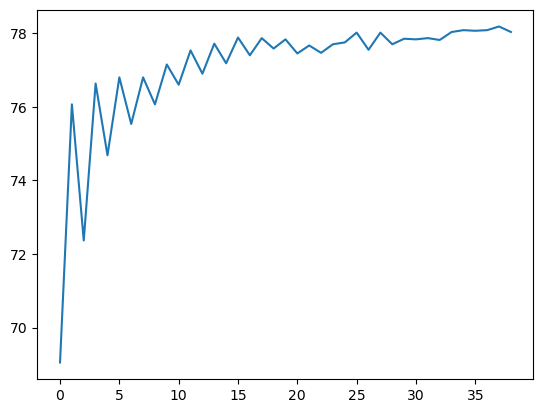

In [132]:
import matplotlib.pyplot as plt
p=plt.plot(lst)

5 .SVM(Support Vector Machine)::

In [134]:
from sklearn.svm import SVC
svc=SVC()

In [135]:
svc.fit(dx_train,dy_train)

SVC()

In [136]:
SVC()

SVC()

In [137]:
p5=svc.predict(dx_test)
p5

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [138]:
M5=confusion_matrix(p5,dy_test)
M5

array([[4690, 1310],
       [   0,    0]], dtype=int64)

In [139]:
acc5=M5.diagonal().sum()/M5.sum()*100
acc5

78.16666666666666

In [140]:
print(classification_report(p5,dy_test))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88      6000
           1       0.00      0.00      0.00         0

    accuracy                           0.78      6000
   macro avg       0.50      0.39      0.44      6000
weighted avg       1.00      0.78      0.88      6000



6 .Naive Bayes::

In [142]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [149]:
import warnings 
warnings.filterwarnings('ignore')

In [151]:
nb.fit(dx_train,dy_train)

ValueError: Negative values in data passed to MultinomialNB (input X)

In [ ]:
MultinomialNB()

In [ ]:
p6=nb.predict(dx_test)
p6

In [ ]:
M6=confusion_matrix(p6,dy_test)
M6

In [ ]:
acc6=M6.diagonal().sum()/M6.sum()*100
acc6

In [ ]:
print(classification_report(p6,dy_test))

Final Result::

In [ ]:
Final Insight::After doing all the six classification model techniques the third one , Random Forest model is the best fitted model of my conclusion 
as its accuracy is high and perfomance is also best according to the classification report here .
With the help of this model we can get the generalize model which is the best model design as expected .